# Johansen Cointegration

In [1]:
import binance_api
import numpy as np
import pandas as pd
import math

import statsmodels
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import statsmodels.api as stat
import statsmodels.tsa.stattools as ts

import matplotlib.pyplot as plt
from datetime import datetime, date

import seaborn as sb
# https://www.marketcalls.in/amibroker/computing-cointegration-and-augmented-dickey-fuller-test-in-amibroker-using-python.html#:~:text=Augmented%20Dicky%20Fuller%20test%20is,stationary%20and%20cointegrated%20or%20not.&text=The%20Augmented%20Dicky%20Fuller%20test,want%20to%20reject%20this%20hypothesis.


## Import Date

In [2]:
# Import Data
assets = ['BTCUSDT', 'ETHUSDT', 'LUNAUSDT', 'SOLUSDT', 'FTMUSDT', 'GALAUSDT', 'NEARUSDT', 'AVAXUSDT', '1000SHIBUSDT', 'SANDUSDT', 'WAVESUSDT', 'ADAUSDT', 'XRPUSDT', 'RUNEUSDT', 'BNBUSDT', 'ATOMUSDT', 'MATICUSDT', 'DOTUSDT', 'MANAUSDT', 'LINKUSDT', 'KNCUSDT', 'AXSUSDT', 'DOGEUSDT', 'LTCUSDT', 'CRVUSDT', 'FILUSDT', 'ONEUSDT']
data = {}
prices = {}

for asset in assets:
    data[asset] = pd.read_csv('./{}_1h.csv'.format(asset), index_col=0)
    data[asset].iloc[:,0] = pd.to_datetime(data[asset].iloc[:,0], unit='ms')
    prices[asset] = pd.DataFrame({'date': data[asset].iloc[:,0], 'price': data[asset].iloc[:,3]})
    prices[asset]['price'] = prices[asset]['price'].apply(lambda x: math.log(x))


## Rolling Cointegration Johansen

In [15]:
def johansen(A, B):
    df = pd.DataFrame({'x': A, 'y': B})
    jres = coint_johansen(df, 0, 1)
    return jres.max_eig_stat[0], jres.max_eig_stat_crit_vals[0]


In [9]:
##
# asset_A: string,
# asset_B: string,
# prices: object containing all imported data
# lookback_window: int that represents the max we are willing to lookback
# rolling_lookback: int that represents the length of the rolling window
def rolling_coint(asset_A, asset_B, prices, lookback_window, rolling_lookback):
    
    data_A = prices[asset_A][(len(prices[asset_A])-lookback_window):]
    data_B = prices[asset_B][(len(prices[asset_B])-lookback_window):]

    # make data same size
    length_A = len(data_A)
    length_B = len(data_B)
    if length_A > length_B:
        data_A = data_A[(length_A-length_B):]
    elif length_B > length_A:
        data_B = data_B[(length_B-length_A):]

    rolling_results = pd.DataFrame({'date':[], 'max_eig': [], 'crit_val_95': [], 'crit_val_99': []})

    for i in range(0, len(data_A)):
        if i+rolling_lookback <= len(data_A):
            data_1 = list(data_A['price'].iloc[i:i+rolling_lookback])
            data_2 = list(data_B['price'].iloc[i:i+rolling_lookback])
            max_eig, eig_crit_val = johansen(data_1, data_2)
            rolling_results = pd.concat([rolling_results, pd.DataFrame({'date':[data_A['date'].iloc[i]], 'max_eig': [max_eig], 'crit_val_95': [eig_crit_val[1]], 'crit_val_99': [eig_crit_val[2]]})])
    
    return rolling_results


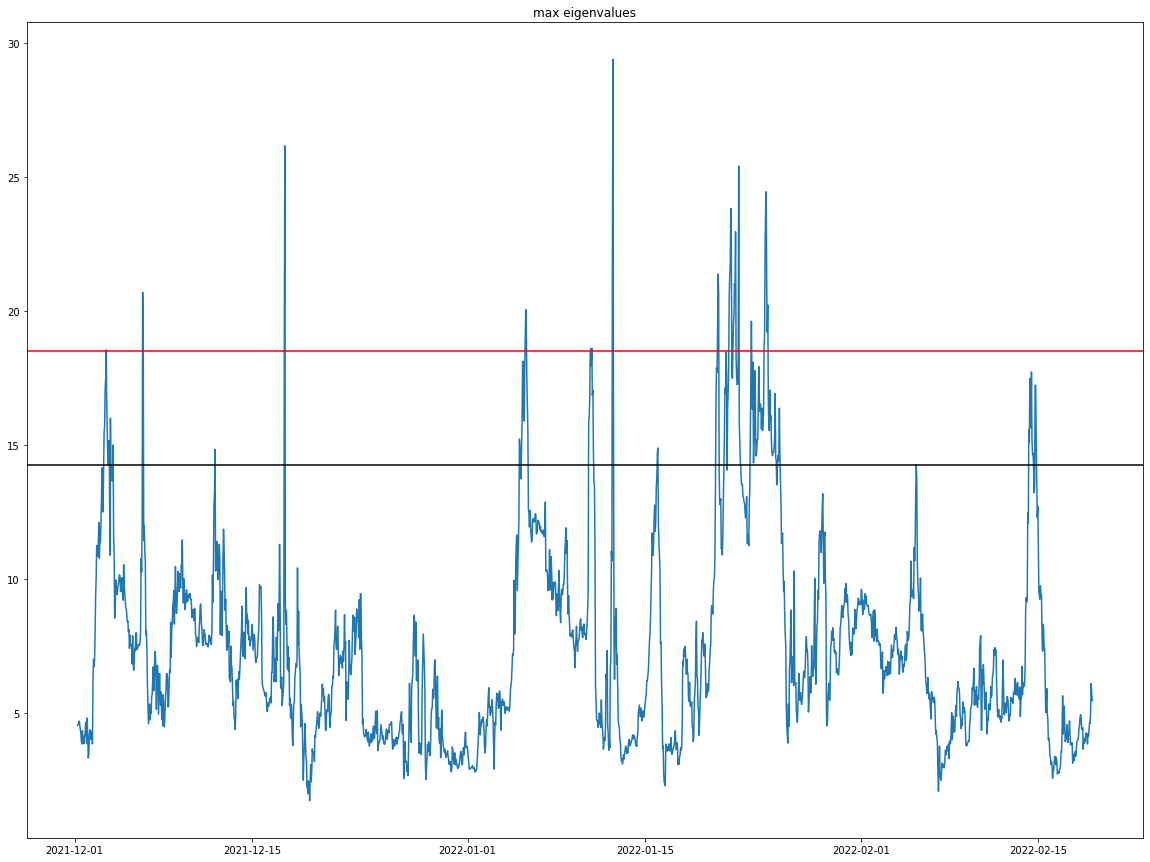

In [45]:
asset_1 = 'WAVESUSDT'
asset_2 = 'ADAUSDT'
max_lookback = 2160
rolling_lookback = 24*10

result = rolling_coint(asset_1, asset_2, prices, max_lookback, rolling_lookback)
plt.figure(figsize=(20,15))
plt.title('max eigenvalues')
plt.plot(result['date'],result['max_eig'])
plt.axhline(y=result.iloc[0]['crit_val_95'], color='black', linestyle='-')
plt.axhline(y=result.iloc[0]['crit_val_99'], color='r', linestyle='-')

In [46]:
for asset in assets

,date,max_eig,crit_val_95,crit_val_99
0,2021-12-01 06:00:00,4.545714,14.2639,18.52
0,2021-12-01 07:00:00,4.603055,14.2639,18.52
0,2021-12-01 08:00:00,4.618700,14.2639,18.52
0,2021-12-01 09:00:00,4.705114,14.2639,18.52
0,2021-12-01 10:00:00,4.537957,14.2639,18.52
...,...,...,...,...
0,2022-02-19 02:00:00,4.621523,14.2639,18.52
0,2022-02-19 03:00:00,5.135554,14.2639,18.52
0,2022-02-19 04:00:00,6.105960,14.2639,18.52
0,2022-02-19 05:00:00,5.692114,14.2639,18.52


In [47]:
result

,date,max_eig,crit_val_95,crit_val_99
0,2021-12-01 06:00:00,4.545714,14.2639,18.52
0,2021-12-01 07:00:00,4.603055,14.2639,18.52
0,2021-12-01 08:00:00,4.618700,14.2639,18.52
0,2021-12-01 09:00:00,4.705114,14.2639,18.52
0,2021-12-01 10:00:00,4.537957,14.2639,18.52
...,...,...,...,...
0,2022-02-19 02:00:00,4.621523,14.2639,18.52
0,2022-02-19 03:00:00,5.135554,14.2639,18.52
0,2022-02-19 04:00:00,6.105960,14.2639,18.52
0,2022-02-19 05:00:00,5.692114,14.2639,18.52
